In [25]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
# import imageio as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [45]:
dataDir='H:/Datasets/COCO/022719/'
# dataType='val2017'
dataType='train2017'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [46]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=30.74s)
creating index...
index created!


In [68]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
# print(cats)
print('number of categories: ', len(cats))
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = [cat['id'] for cat in cats]
print('COCO ids: \n{}'.format(nms))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

number of categories:  80
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO ids: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
COCO superc

In [48]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
# imgIds = coco.getImgIds(imgIds = [19579])
print(imgIds)

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[379520, 55809, 46978, 438915, 500100, 209028, 89350, 341623, 306440, 76937, 372874, 22796, 282768, 360595, 366484, 410005, 172310, 449560, 557721, 22427, 365340, 363549, 354721, 47909, 125351, 312233, 28842, 304173, 241837, 560561, 88754, 429236, 536244, 380724, 55478, 23737, 377278, 411583, 476736, 461632, 463044, 569158, 102599, 231240, 296782, 48595, 558036, 518613, 441470, 493020, 297692, 162396, 547421, 176229, 392166, 251368, 255209, 353644, 155117, 551795, 556149, 45175, 568187, 158718, 575615]


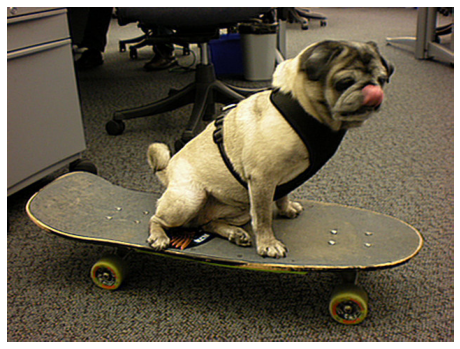

In [49]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[7654, 639931, 1718346, 1737895]
[{'segmentation': [[234.69, 214.5, 257.87, 196.15, 279.01, 178.57, 291.75, 167.74, 312.78, 151.81, 332.53, 137.16, 343.36, 130.78, 366.3, 121.23, 381.59, 119.31, 380.32, 108.48, 380.96, 95.74, 385.42, 84.91, 390.52, 79.17, 399.44, 75.99, 406.45, 74.71, 412.82, 70.89, 421.74, 61.97, 446.59, 49.22, 466.34, 45.4, 477.17, 46.68, 491.19, 49.22, 503.3, 49.22, 516.04, 49.22, 523.69, 48.59, 531.97, 55.6, 532.61, 64.52, 544.08, 74.07, 556.82, 81.08, 556.82, 88.73, 551.09, 95.74, 549.17, 102.11, 548.54, 106.57, 547.9, 111.67, 543.44, 107.21, 541.53, 107.21, 537.07, 116.13, 540.89, 129.51, 536.43, 136.52, 531.33, 148.63, 528.15, 149.26, 524.96, 149.9, 524.32, 155.63, 521.78, 160.73, 517.95, 162.64, 516.68, 163.28, 515.4, 166.47, 510.94, 169.65, 493.1, 171.56, 489.92, 174.75, 484.82, 179.21, 471.44, 202.79, 460.61, 218.08, 441.49, 239.11, 414.09, 260.77, 403.9, 269.05, 408.99, 277.97, 420.46, 277.97, 426.2, 291.36, 421.1, 295.82, 418.55, 298.36, 415.37, 302.19, 409

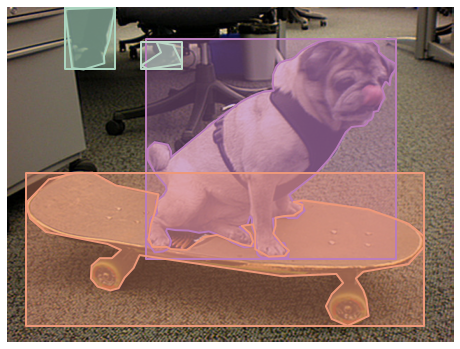

In [55]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns,draw_bbox=True)

In [51]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=10.49s)
creating index...
index created!


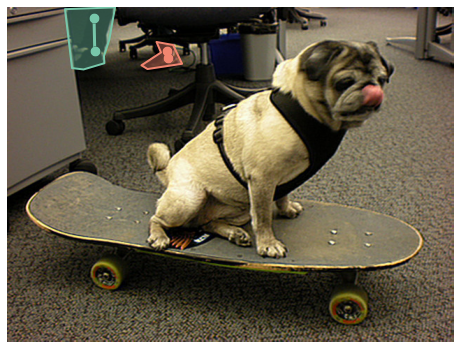

In [52]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [53]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=1.81s)
creating index...
index created!


A small pug riding on top of a skateboard.
A pug licking his lips on a skateboard.
A pug on a skateboard is a comical site.
The a floor level shot of an office area shows parts of a desk and table, the wheeled bottoms of some office chairs, and front and center, a pug on a skateboard. 
A pug in a harness sits on a skateboard in an office.


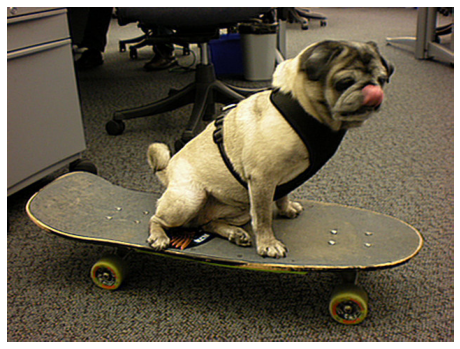

In [54]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()